In [1]:
using Plots

In [3]:
using DifferentialEquations

In [289]:
function system_evolution(ds, s, p, t)
    state = s[1]
    lambda = s[2]
    
    if state <= 0
        ds[1] = 0.0
        ds[2] = 0.0
    else
        h = 0

        if isapprox(lambda, init_p)
            h = opt_h
        elseif lambda > init_p
            h = 1
        end
                
        delta_lambda = interest_rate * lambda - lambda * (1 - 2 * state)
        delta_x = state*(1-state) - h
        
        #println(string("lambda: ", delta_lambda, ", state: ", delta_x))

        
        ds[1] = delta_x
        ds[2] = delta_lambda
    end

    
end

system_evolution (generic function with 1 method)

In [290]:
gr(size=(800,600))


Plots.GRBackend()

In [504]:
function compute_solutions(coord_space=[[init_p, 0.5]], t=(0.0, 10.0), with_plot=true)

    solutions = []
    for coords in coord_space
    
      upper = ODEProblem(system_evolution, coords, t)
      solution = solve(upper, alg_hint=:nonstiff)

      push!(solutions, solution)


    end
    
    if with_plot
        space_plot = plot([init_p], seriestype="hline", color=:black, legend=false, linewidth=2, ylabel="lambda", xlabel="fish population")
        space_plot = plot!([stable_x], seriestype="vline",color=:black, legend=false, linewidth=2)

        for solution in solutions
            plot!(solution, vars=(1, 2), linewidth = 2)
        end

        
        ylims!(0, 2)
        display(space_plot)

        lambda_plot = plot(ylabel="lambda", legend=false)
        for solution in solutions
            plot!(solution, vars=(0, 2))
        end

        display(lambda_plot)


        state_plot = plot(ylabel="fish population", legend=false)

        for solution in solutions
            plot!(solution, vars=(0,1))
        end

        display(state_plot)
    end
    
    return solutions
end


compute_solutions (generic function with 4 methods)

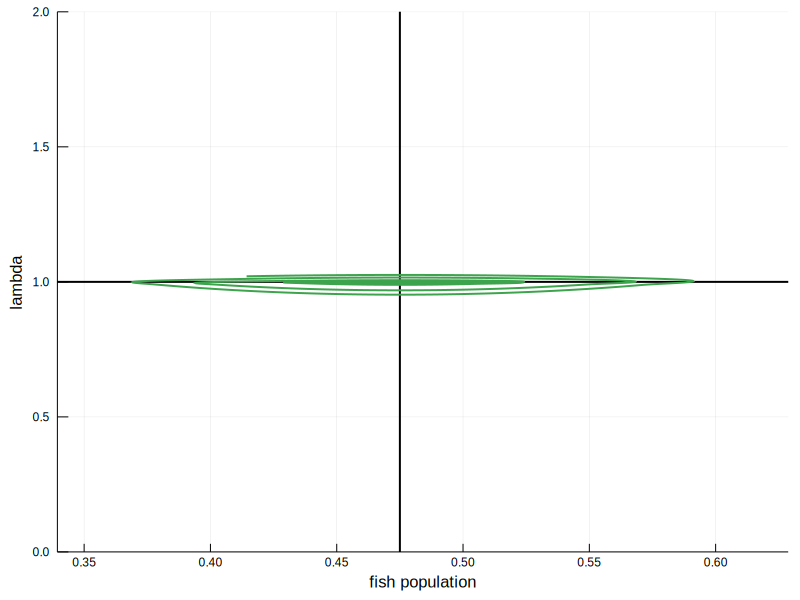

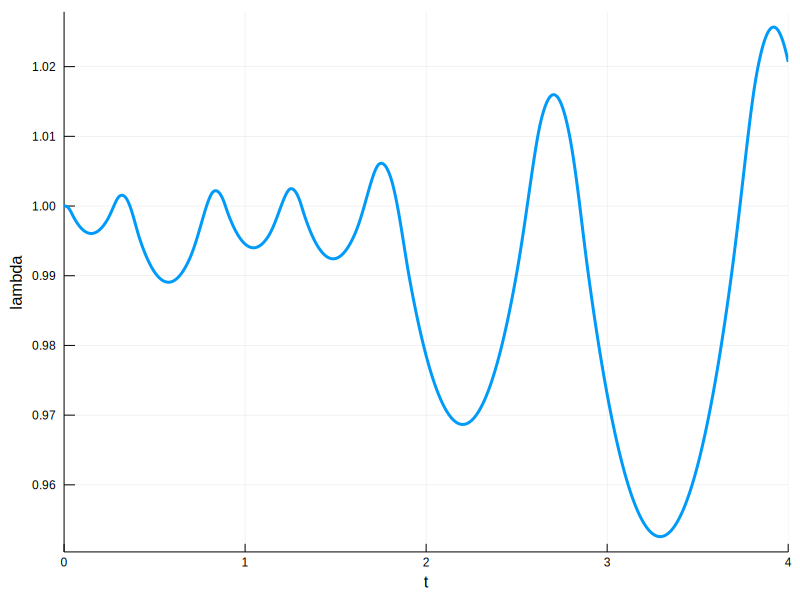

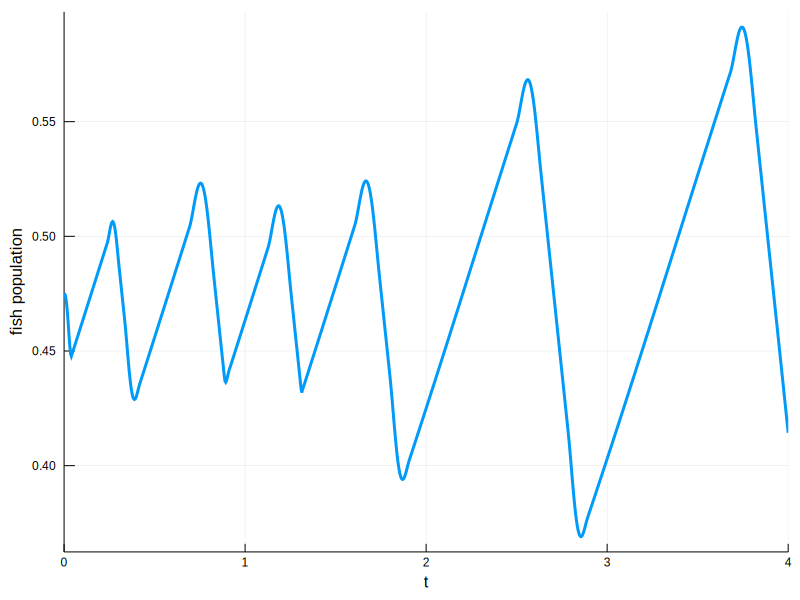

1-element Array{Any,1}:
 retcode: Success
Interpolation: Automatic order switching interpolation
t: [0.0, 0.0407812435991073, 0.05881157510497169, 0.2391148901636156, 0.30394501198562623, 0.33484840036426067, 0.41717378373929115, 0.45470120787647184, 0.6933822529889074, 0.827613039511544  …  2.635089744790476, 2.693848450382156, 2.785029016303943, 2.8911918666639673, 2.93711645960085, 3.3963623889696732, 3.6812145693275697, 3.8227392873702253, 3.884544065966196, 4.0]
u: Array{Float64,1}[[0.475, 1.0], [0.44785285120823903, 0.9990246896518308], [0.4523154787524765, 0.9981274634461587], [0.49724597371788093, 0.9980362752424481], [0.4866419621914077, 1.001363452297799], [0.46344379124858204, 1.0013662905262686], [0.43544559682501643, 0.9953459872387054], [0.44469238164189584, 0.9927396066575215], [0.5041353019439518, 0.9924331513121951], [0.4821997517381421, 1.0021246584903767]  …  [0.5270532840747215, 1.0123153543567687], [0.4829732667727345, 1.0158919199383492], [0.414312041263781, 1.011

In [505]:
init_p = 1
interest_rate = 0.05
opt_h = (1 - interest_rate)^2 / 4
stable_x = (1 - interest_rate) /2

space = coord_space=[[stable_x, init_p]]
solutions = compute_solutions(space, (0., 4))
